1. На основе датасета titanic обучить дерево решений
2. Подобрать оптимальную глубину дерева так же, как мы делали на занятии
3. Определить самые важные фичи
4. Визуализировать полученное дерево

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

C:\Users\econo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# На основе датасета titanic обучить дерево решений

### dataset

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [35]:
# train_df.head()

In [36]:
# test_df.head()

In [5]:
# train_df.info()

In [6]:
# test_df.info()

In [7]:
# заполним нулевые значения маркером, который точно не встречается в изначальной выборке - -999

train_df = train_df.fillna(-999)
test_df = test_df.fillna(-999)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

In [11]:
X_train[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-999,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-999,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-999,S


In [12]:
y_train[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
X_test[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,-999,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,-999,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,-999,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,-999,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,-999,S


### lable encoding

In [14]:
cat_col_list = X_train.select_dtypes(object).columns
digit_col_list = X_train.drop(cat_col_list, axis=1).columns

In [15]:
input_x_train_cat = X_train[cat_col_list].astype(str)
input_x_train_digit = X_train[digit_col_list]

input_x_test_cat = X_test[cat_col_list].astype(str)
input_x_test_digit = X_test[digit_col_list]

In [16]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
OH_X_train = input_x_train_cat.apply(LabelEncoder().fit_transform)
OH_X_test = input_x_test_cat.apply(LabelEncoder().fit_transform)

In [17]:
X_train = pd.concat([input_x_train_digit, OH_X_train], axis=1)
X_test = pd.concat([input_x_test_digit, OH_X_test], axis=1)

Наверное был смысл изначально объяединить датасеты с возможностью дальнейшего разделения, так как все преобразования FE необходимо делать несколько раз.  
В датасете однозначно можно поработать не только над заполнением пустых значений, но и категориальными переменными. 

###  desicion tree  

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf = DecisionTreeClassifier(max_depth=5)

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
y_predict = clf.predict(X_test)

In [22]:
y_predict_proba = clf.predict_proba(X_test)

# Подобрать оптимальную глубину дерева так же, как мы делали на занятии

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [25]:
%%time
gridsearch.fit(X_train, y_train)

Wall time: 253 ms


C:\Users\econo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [26]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00259442, 0.0030005 , 0.00355835, 0.00320735, 0.00381618,
        0.0037992 , 0.0043952 , 0.00380435, 0.00379982]),
 'std_fit_time': array([0.00079345, 0.00109497, 0.00128461, 0.00041298, 0.00075916,
        0.00075211, 0.00102445, 0.00040316, 0.00074672]),
 'mean_score_time': array([0.00140262, 0.00120029, 0.00159974, 0.00179281, 0.00139771,
        0.00180092, 0.00161138, 0.00139494, 0.00160079]),
 'std_score_time': array([0.00049273, 0.00040038, 0.00049035, 0.00115694, 0.00080469,
        0.00097938, 0.00049924, 0.00079003, 0.00048934]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9}],
 'split0_tes

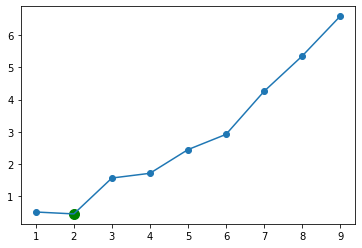

In [27]:
scores = [-x for x in gridsearch.cv_results_['mean_test_score']]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100) 

In [28]:
clf_final = DecisionTreeClassifier(max_depth=2)
clf_final.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Определить самые важные фичи

In [29]:
clf_final.feature_importances_

array([0.        , 0.18259395, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.72905042, 0.        , 0.08835564,
       0.        ])

''

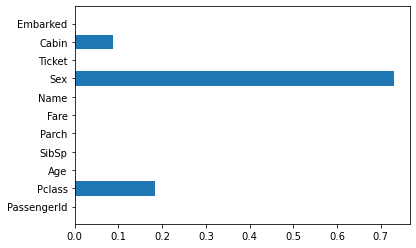

In [41]:
plt.barh(np.arange(len(clf_final.feature_importances_)), clf_final.feature_importances_)
plt.yticks(np.arange(len(X_train.columns)),X_train.columns)
''

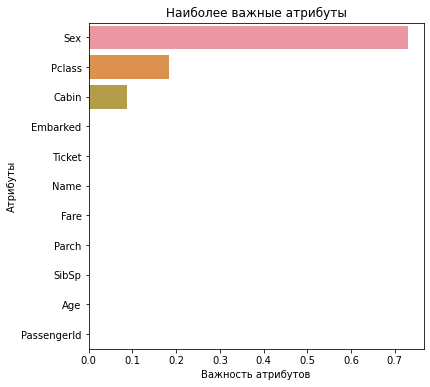

In [31]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(clf_final.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

# Визуализировать полученное дерево

C:\Users\econo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


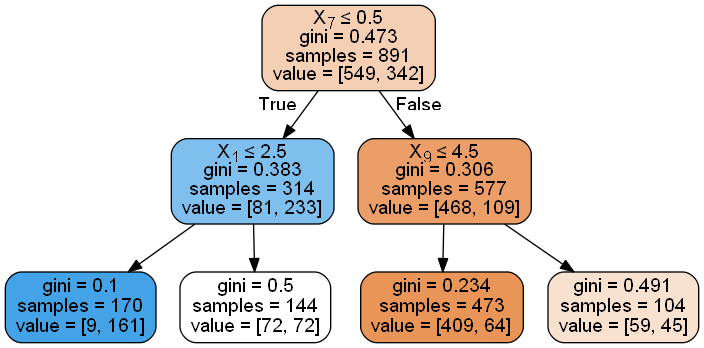

In [32]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_final, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [33]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf_final, feature_names=None, class_names=None):
    print(export_graphviz(clf_final, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [34]:
get_tree_dot_view(clf_final, list(X_train.columns), y_train.astype(str))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = 0", fillcolor="#f5cfb4"] ;
1 [label="Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = 1", fillcolor="#7ebfee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = 1", fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label="gini = 0.5\nsamples = 144\nvalue = [72, 72]\nclass = 0", fillcolor="#ffffff"] ;
1 -> 3 ;
4 [label="Cabin <= 4.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = 0", fillcolor="#eb9e67"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.234\nsamples = 473\nvalue = [409, 64]\nclass = 0", fillcolor="#e99558"] ;
4 -> 5 ;
6 [label="gini = 0.491\nsamples = 104\nvalue = [59, 45]\nclass = 0", fillcolor="#f9e1d0"] ;
4 -> 6 ;
}
